# Conll2003 Dataset - NER task - ERNIE

In [1]:
pip install transformers

In [2]:
pip install datasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 510.5/510.5 kB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 15.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 13.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 8.5 MB/s eta 0:00:00


In [3]:
!pip install --upgrade scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 86.9 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2


In [4]:
pip install imblearn

In [5]:
!pip install seqeval

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 1.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for seqeval: filename=seqeval-1.2.2-py3-none-any.whl size=16161 sha256=dfad7c7d6c28f3337ac156534a36e9c24b667cb1c7099dfd54adbe28095b6d3f
  Stored in directory: /root/.cache/pip/wheels/1a/67/4a/ad4082dd7dfc30f2abfe4d80a2ed5926a506eb8a972b4767fa
Successfully built seqeval


In [6]:
pip install evaluate

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.1/84.1 kB 1.4 MB/s eta 0:00:00


In [7]:
!pip install accelerate -U

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 290.1/290.1 kB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 65.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 61.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 93.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 1.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 11.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 166.0/166.0 MB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.1/99.1 kB 15.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ast
#from transformers import BertTokenizer
from datasets import DatasetDict, Dataset
from sklearn.model_selection import train_test_split
from torch.utils.data import TensorDataset
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from transformers import AutoModelForTokenClassification

In [9]:
from datasets import load_dataset

In [10]:
raw_datasets = load_dataset("conll2003")
raw_datasets

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Generating train split:   0%|          | 0/14041 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/3250 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/3453 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['id', 'tokens', 'pos_tags', 'chunk_tags', 'ner_tags'],
        num_rows: 14041
    })
    validation: Dataset({
        features: ['id', 'tokens', 'pos_tags', 'chunk_tags', 'ner_tags'],
        num_rows: 3250
    })
    test: Dataset({
        features: ['id', 'tokens', 'pos_tags', 'chunk_tags', 'ner_tags'],
        num_rows: 3453
    })
})

In [11]:
#raw = pd.DataFrame(raw_datasets["train"])

In [12]:
dataset = load_dataset('conll2003', split='train+validation+test')
df = pd.DataFrame(dataset)
#df.sample(frac=1).reset_index(drop=True, inplace=True)

In [13]:
df = df.drop(["id"],axis =1)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20744 entries, 0 to 20743
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   tokens      20744 non-null  object
 1   pos_tags    20744 non-null  object
 2   chunk_tags  20744 non-null  object
 3   ner_tags    20744 non-null  object
dtypes: object(4)
memory usage: 648.4+ KB


In [15]:
df[df['tokens'].duplicated()].count()

tokens        2013
pos_tags      2013
chunk_tags    2013
ner_tags      2013
dtype: int64

In [16]:
df.drop(df[df['tokens'].duplicated()].index, inplace = True)

In [17]:
df.reset_index(inplace = True)

In [18]:
df.drop('index',axis=1,inplace=True)

In [ ]:
df

,tokens,pos_tags,chunk_tags,ner_tags
0,"[EU, rejects, German, call, to, boycott, Briti...","[22, 42, 16, 21, 35, 37, 16, 21, 7]","[11, 21, 11, 12, 21, 22, 11, 12, 0]","[3, 0, 7, 0, 0, 0, 7, 0, 0]"
1,"[Peter, Blackburn]","[22, 22]","[11, 12]","[1, 2]"
2,"[BRUSSELS, 1996-08-22]","[22, 11]","[11, 12]","[5, 0]"
3,"[The, European, Commission, said, on, Thursday...","[12, 22, 22, 38, 15, 22, 28, 38, 15, 16, 21, 3...","[11, 12, 12, 21, 13, 11, 11, 21, 13, 11, 12, 1...","[0, 3, 4, 0, 0, 0, 0, 0, 0, 7, 0, 0, 0, 0, 0, ..."
4,"[Germany, 's, representative, to, the, Europea...","[22, 27, 21, 35, 12, 22, 22, 27, 16, 21, 22, 2...","[11, 11, 12, 13, 11, 12, 12, 11, 12, 12, 12, 1...","[5, 0, 0, 0, 0, 3, 4, 0, 0, 0, 1, 2, 0, 0, 0, ..."
...,...,...,...,...
18726,"[That, is, why, this, is, so, emotional, a, ni...","[12, 42, 46, 12, 42, 30, 16, 12, 21, 15, 28, 6...","[11, 21, 3, 11, 21, 1, 2, 11, 12, 13, 11, 0, 0...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0]"
18727,"["", It, was, the, joy, that, we, all, had, ove...","[0, 28, 38, 12, 21, 15, 28, 12, 38, 15, 12, 21...","[0, 11, 21, 11, 12, 17, 11, 11, 21, 13, 11, 12...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
18728,"[Charlton, managed, Ireland, for, 93, matches,...","[22, 38, 22, 15, 11, 24, 6, 15, 43, 21, 28, 38...","[11, 21, 11, 13, 11, 12, 0, 13, 11, 12, 11, 21...","[1, 0, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
18729,"[He, guided, Ireland, to, two, successive, Wor...","[28, 38, 22, 35, 11, 16, 22, 22, 24, 24, 10, 3...","[11, 21, 11, 21, 11, 12, 12, 12, 12, 12, 0, 13...","[0, 0, 5, 0, 0, 0, 7, 8, 0, 0, 0, 0, 0, 0, 7, ..."


In [19]:
df_dropped = df.drop(columns=['chunk_tags', 'pos_tags'])

In [20]:
df_dropped.head()

,tokens,ner_tags
0,"[EU, rejects, German, call, to, boycott, Briti...","[3, 0, 7, 0, 0, 0, 7, 0, 0]"
1,"[Peter, Blackburn]","[1, 2]"
2,"[BRUSSELS, 1996-08-22]","[5, 0]"
3,"[The, European, Commission, said, on, Thursday...","[0, 3, 4, 0, 0, 0, 0, 0, 0, 7, 0, 0, 0, 0, 0, ..."
4,"[Germany, 's, representative, to, the, Europea...","[5, 0, 0, 0, 0, 3, 4, 0, 0, 0, 1, 2, 0, 0, 0, ..."


In [ ]:
#from google.colab import drive

#drive.mount('/content/drive')

#!ls "/content/drive/MyDrive/Data298/"
#directory = "/content/drive/MyDrive/Data298/"

In [ ]:
#df.to_csv(directory + "ConLL2003.csv")

# ERNIE TRANSFORMER

In [ ]:
from transformers import AutoTokenizer

model_checkpoint = "nghuyong/ernie-2.0-base-en"
tokenizer = AutoTokenizer.from_pretrained(model_checkpoint)

In [ ]:
inputs = tokenizer(df["tokens"][0], is_split_into_words=True)
inputs.tokens()

['[CLS]',
 'eu',
 'rejects',
 'german',
 'call',
 'to',
 'boycott',
 'british',
 'lamb',
 '.',
 '[SEP]']

In [ ]:
def align_labels_with_tokens(labels, word_ids):
    new_labels = []
    current_word = None
    for word_id in word_ids:
        if word_id != current_word:
            # Start of a new word!
            current_word = word_id
            label = -100 if word_id is None else labels[word_id]
            new_labels.append(label)
        elif word_id is None:
            # Special token
            new_labels.append(-100)
        else:
            # Same word as previous token
            label = labels[word_id]
            # If the label is B-XXX we change it to I-XXX
            if label % 2 == 1:
                label += 1
            new_labels.append(label)

    return new_labels

In [ ]:
labels = df["ner_tags"][0]
word_ids = inputs.word_ids()
print(labels)
print(align_labels_with_tokens(labels, word_ids))

[3, 0, 7, 0, 0, 0, 7, 0, 0]
[-100, 3, 0, 7, 0, 0, 0, 7, 0, 0, -100]


In [ ]:
# convert the dataframe to a Hugging Face Dataset object
dataset = Dataset.from_pandas(df)

# create a DatasetDict object
dataset_dict = DatasetDict({'data': dataset})

# print the DatasetDict object
print(dataset_dict)

DatasetDict({
    data: Dataset({
        features: ['tokens', 'pos_tags', 'chunk_tags', 'ner_tags'],
        num_rows: 18731
    })
})


In [ ]:
dataset_dict['data']

Dataset({
    features: ['tokens', 'pos_tags', 'chunk_tags', 'ner_tags'],
    num_rows: 18731
})

In [ ]:
def tokenize_and_align_labels(examples):
    tokenized_inputs = tokenizer(
        examples["tokens"], truncation=True, is_split_into_words=True
    )
    all_labels = examples["ner_tags"]
    new_labels = []
    for i, labels in enumerate(all_labels):
        word_ids = tokenized_inputs.word_ids(i)
        new_labels.append(align_labels_with_tokens(labels, word_ids))

    tokenized_inputs["labels"] = new_labels
    return tokenized_inputs

In [ ]:
tokenized_datasets = dataset_dict.map(
    tokenize_and_align_labels,
    batched=True,
    remove_columns=dataset_dict["data"].column_names,
)

Map:   0%|          | 0/18731 [00:00<?, ? examples/s]

Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.


In [ ]:
tokenized_datasets

DatasetDict({
    data: Dataset({
        features: ['input_ids', 'token_type_ids', 'attention_mask', 'labels'],
        num_rows: 18731
    })
})

In [ ]:
from transformers import DataCollatorForTokenClassification

data_collator = DataCollatorForTokenClassification(tokenizer=tokenizer)

In [ ]:
batch = data_collator(tokenized_datasets["data"])

You're using a BertTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


In [ ]:
#batch['labels']

In [ ]:
#pd.DataFrame({'input_ids': batch['input_ids'], 'token_type_ids': batch['token_type_ids'], 'attention_mask': batch['attention_mask'], 'labels': batch['labels']})
batch_df = pd.DataFrame({'input_ids': batch['input_ids'].tolist(), 'token_type_ids': batch['token_type_ids'].tolist(), 'attention_mask': batch['attention_mask'].tolist(), 'labels': batch['labels'].tolist()})

In [ ]:
batch_df['input_ids'].str.len().max

<bound method NDFrame._add_numeric_operations.<locals>.max of 0        164
1        164
2        164
3        164
4        164
        ... 
18726    164
18727    164
18728    164
18729    164
18730    164
Name: input_ids, Length: 18731, dtype: int64>

In [ ]:
batch_df[batch_df['input_ids'].duplicated()].count()

input_ids         24
token_type_ids    24
attention_mask    24
labels            24
dtype: int64

In [ ]:
batch_df.drop(batch_df[batch_df['input_ids'].duplicated()].index, inplace = True)

In [ ]:
batch_df

,input_ids,token_type_ids,attention_mask,labels
0,"[101, 7327, 19164, 2446, 2655, 2000, 17757, 23...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, ...","[-100, 3, 0, 7, 0, 0, 0, 7, 0, 0, -100, -100, ..."
1,"[101, 2848, 13934, 102, 0, 0, 0, 0, 0, 0, 0, 0...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[-100, 1, 2, -100, -100, -100, -100, -100, -10..."
2,"[101, 9371, 2727, 1011, 5511, 1011, 2570, 102,...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, ...","[-100, 5, 0, 0, 0, 0, 0, -100, -100, -100, -10..."
3,"[101, 1996, 2647, 3222, 2056, 2006, 9432, 2009...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[-100, 0, 3, 4, 0, 0, 0, 0, 0, 0, 7, 0, 0, 0, ..."
4,"[101, 2762, 1005, 1055, 4387, 2000, 1996, 2647...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[-100, 5, 0, 0, 0, 0, 0, 3, 4, 0, 0, 0, 0, 1, ..."
...,...,...,...,...
18726,"[101, 2008, 2003, 2339, 2023, 2003, 2061, 6832...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[-100, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
18727,"[101, 1000, 2009, 2001, 1996, 6569, 2008, 2057...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[-100, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
18728,"[101, 17821, 3266, 3163, 2005, 6109, 3503, 101...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[-100, 1, 0, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
18729,"[101, 2002, 8546, 3163, 2000, 2048, 11165, 208...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[-100, 0, 0, 5, 0, 0, 0, 7, 8, 0, 0, 0, 0, 0, ..."


In [ ]:
train_df, test_df = train_test_split(batch_df, test_size=0.2, random_state=42)
test_df, val_df = train_test_split(test_df, test_size=0.5, random_state=42)

In [ ]:
train_df.reset_index(drop=True,inplace=True)
test_df.reset_index(drop=True,inplace=True)
val_df.reset_index(drop=True,inplace=True)

In [ ]:
# create a DatasetDict object
train = Dataset.from_pandas(train_df)
test = Dataset.from_pandas(test_df)
validation = Dataset.from_pandas(val_df)
transformed_dataset = DatasetDict({'train': train, 'test': test,'validation': validation})

In [ ]:
transformed_dataset

DatasetDict({
    train: Dataset({
        features: ['input_ids', 'token_type_ids', 'attention_mask', 'labels'],
        num_rows: 14965
    })
    test: Dataset({
        features: ['input_ids', 'token_type_ids', 'attention_mask', 'labels'],
        num_rows: 1871
    })
    validation: Dataset({
        features: ['input_ids', 'token_type_ids', 'attention_mask', 'labels'],
        num_rows: 1871
    })
})

#Data Statistics

In [ ]:
import itertools
# flattening the list and storing the result
flat_list_input_ids = itertools.chain(*batch_df['input_ids'])
flat_list_value = list(flat_list_input_ids)

flat_list_label = itertools.chain(*batch_df['labels'])
flat_list_label_value = list(flat_list_label)

In [ ]:
#@title
# Access the encoded sequences as a list of lists of integers representing the token IDs
#input_ids = tokenized_datasets["input_ids"]

# Convert the token IDs back into tokens
tokens = [tokenizer.convert_ids_to_tokens(ids) for ids in flat_list_value]
tokens_df = pd.DataFrame(tokens, columns = ['tokens'])

In [ ]:
tokens_df.head(5)

,tokens
0,[CLS]
1,eu
2,rejects
3,german
4,call


In [ ]:
flat_list_label_value = pd.DataFrame(flat_list_label_value, columns = ['labels'])

In [ ]:
flat_list_label_value.groupby('labels').size().sort_values(ascending=False)

labels
-100    2708485
 0       283573
 2        21237
 4        12236
 1         9911
 5         9832
 3         8802
 6         5334
 7         4831
 8         3707
dtype: int64

In [ ]:
transformed_label = flat_list_label_value.replace({0:'O', 1:'B-PER', 2:'I-PER',3: 'B-ORG', 4:'I-ORG', 5:'B-LOC', 6:'I-LOC', 7:'B-MISC', 8:'I-MISC', -100:'PAD'})
transformed_label

,labels
0,PAD
1,B-ORG
2,O
3,B-MISC
4,O
...,...
3067943,PAD
3067944,PAD
3067945,PAD
3067946,PAD


In [ ]:
transformed_label.groupby('labels').size().sort_values(ascending=False)

labels
PAD       2708485
O          283573
I-PER       21237
I-ORG       12236
B-PER        9911
B-LOC        9832
B-ORG        8802
I-LOC        5334
B-MISC       4831
I-MISC       3707
dtype: int64

<Axes: xlabel='labels'>

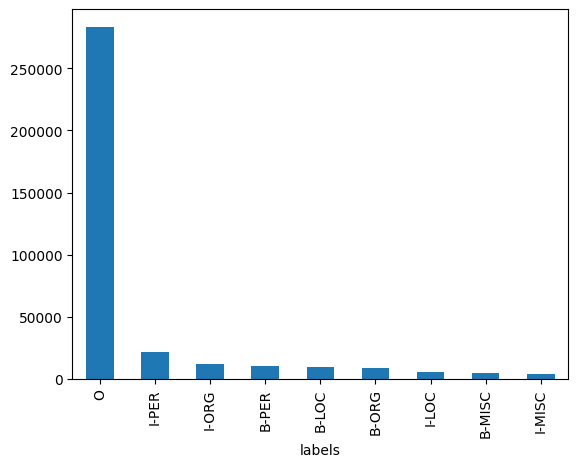

In [ ]:
transformed_label.groupby('labels').size().sort_values(ascending=False)[1:].plot(kind='bar')

In [ ]:
tokens_df.groupby('tokens').size().sort_values(ascending=False)

tokens
[PAD]     2671071
[CLS]       18707
[SEP]       18707
.           17610
the         12282
           ...   
mocked          1
mock            1
mn              1
##ume           1
##ulia          1
Length: 15985, dtype: int64

In [ ]:
top_30 = tokens_df.groupby('tokens').size().sort_values(ascending=False)[30:71]

<Axes: xlabel='tokens'>

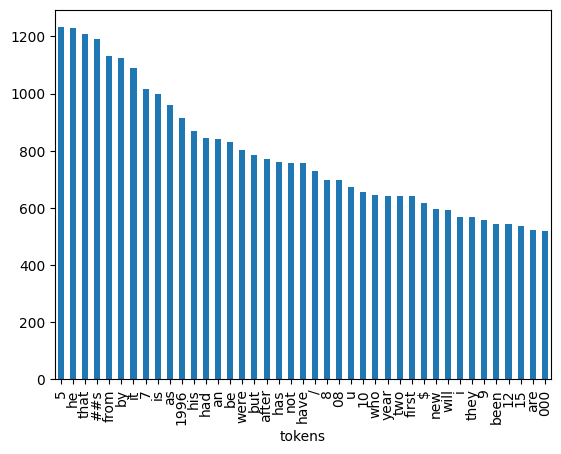

In [ ]:
top_30.plot(kind='bar')

In [ ]:
#tokenized_df = pd.DataFrame({'tokens': tokenized_datasets['data']tokens, 'labels': tokenized_datasets['data']['labels']})
#tokenized_df
#pd.DataFrame({'input_ids': tokenized_datasets['data']['input_ids'], 'token_type_ids': tokenized_datasets['data']['token_type_ids'], 'attention_mask': tokenized_datasets['data']['attention_mask'], 'labels': tokenized_datasets['data']['labels']})

#Evaluation Metrics

In [ ]:
import evaluate

metric = evaluate.load("seqeval")

In [ ]:
#metrics
def compute_metrics(eval_preds):
    logits, labels = eval_preds
    predictions = np.argmax(logits, axis=-1)

    # Remove ignored index (special tokens) and convert to labels
    true_labels = [[label_names[l] for l in label if l != -100] for label in labels]
    true_predictions = [
        [label_names[p] for (p, l) in zip(prediction, label) if l != -100]
        for prediction, label in zip(predictions, labels)
    ]

    all_metrics = metric.compute(predictions=true_predictions, references=true_labels)

    return {
        "precision": all_metrics["overall_precision"],
        "recall": all_metrics["overall_recall"],
        "f1": all_metrics["overall_f1"],
        "accuracy": all_metrics["overall_accuracy"]
    }

#Model Development

In [ ]:
ner_feature = raw_datasets["train"].features["ner_tags"]
print(ner_feature)

label_names = ner_feature.feature.names
print(label_names)

Sequence(feature=ClassLabel(names=['O', 'B-PER', 'I-PER', 'B-ORG', 'I-ORG', 'B-LOC', 'I-LOC', 'B-MISC', 'I-MISC'], id=None), length=-1, id=None)
['O', 'B-PER', 'I-PER', 'B-ORG', 'I-ORG', 'B-LOC', 'I-LOC', 'B-MISC', 'I-MISC']


In [ ]:
id2label = {i: label for i, label in enumerate(label_names)}
label2id = {v: k for k, v in id2label.items()}

In [ ]:
label2id

{'O': 0,
 'B-PER': 1,
 'I-PER': 2,
 'B-ORG': 3,
 'I-ORG': 4,
 'B-LOC': 5,
 'I-LOC': 6,
 'B-MISC': 7,
 'I-MISC': 8}

In [ ]:
model = AutoModelForTokenClassification.from_pretrained(
    model_checkpoint,
    id2label=id2label,
    label2id=label2id,
)

Some weights of ErnieForTokenClassification were not initialized from the model checkpoint at nghuyong/ernie-2.0-base-en and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
model.config.num_labels

9

In [ ]:
from huggingface_hub import notebook_login

notebook_login()

In [ ]:
from transformers import TrainingArguments

args = TrainingArguments(
    "ernie-finetuned-ner-task",
    evaluation_strategy="epoch",
    save_strategy="epoch",
    learning_rate=2e-5,
    num_train_epochs=4,
    weight_decay=0.01,
    push_to_hub=True,
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
)

In [ ]:
from transformers import Trainer

trainer = Trainer(
    model=model,
    args=args,
    train_dataset=transformed_dataset["train"],
    eval_dataset=transformed_dataset["validation"],
    data_collator=data_collator,
    compute_metrics=compute_metrics,
    tokenizer=tokenizer,
)
trainer.train()

Epoch,Training Loss,Validation Loss,Precision,Recall,F1,Accuracy
1,0.078600,0.071762,0.905167,0.928055,0.916468,0.981934
2,0.043300,0.074216,0.921866,0.934076,0.927931,0.983889
3,0.022000,0.086057,0.922235,0.938892,0.930489,0.983609
4,0.014500,0.080189,0.932320,0.941300,0.936788,0.985257


TrainOutput(global_step=7484, training_loss=0.04937717125799362, metrics={'train_runtime': 1923.0222, 'train_samples_per_second': 31.128, 'train_steps_per_second': 3.892, 'total_flos': 5010396587843040.0, 'train_loss': 0.04937717125799362, 'epoch': 4.0})

#VALIDATION DATASET

In [ ]:
#metrics
def compute_metrics_new(eval_preds):
    logits, labels = eval_preds
    predictions = np.argmax(logits, axis=-1)

    # Remove ignored index (special tokens) and convert to labels
    true_labels = [[label_names[l] for l in label if l != -100] for label in labels]
    true_predictions = [
        [label_names[p] for (p, l) in zip(prediction, label) if l != -100]
        for prediction, label in zip(predictions, labels)
    ]

    #decoded_labels = [label_to_index[prediction] for prediction in predicted_labels]

    # Calculate the confusion matrix
    confusion_matrix_result = confusion_matrix(
        # Flatten the nested lists into 1D lists
        y_true = [label for sublist in true_labels for label in sublist],
        y_pred = [label for sublist in true_predictions for label in sublist],
        labels=['O', 'B-PER', 'I-PER', 'B-ORG', 'I-ORG', 'B-LOC', 'I-LOC', 'B-MISC', 'I-MISC']  # Provide the unique labels used in your NER task
    )

    all_metrics = metric.compute(predictions=true_predictions, references=true_labels)

    return {
        "precision": all_metrics["overall_precision"],
        "recall": all_metrics["overall_recall"],
        "f1": all_metrics["overall_f1"],
        "accuracy": all_metrics["overall_accuracy"], \
        "confusion matrix": confusion_matrix_result
    }

In [ ]:
from transformers import DataCollatorForTokenClassification, Trainer, TrainingArguments, AutoTokenizer, AutoModelForTokenClassification
training_args = TrainingArguments(
    per_device_eval_batch_size=8,
    output_dir='./results',
)

non_finetuned_model = AutoModelForTokenClassification.from_pretrained("nghuyong/ernie-2.0-base-en", num_labels=len(raw_datasets["train"].features["ner_tags"].feature.names))

val_trainer = Trainer(
    model=non_finetuned_model,
    args=training_args,
    data_collator=data_collator,
    eval_dataset=transformed_dataset["validation"],
    compute_metrics=compute_metrics_new,  # pass the compute_metrics function here
)


Some weights of ErnieForTokenClassification were not initialized from the model checkpoint at nghuyong/ernie-2.0-base-en and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
val_results = val_trainer.evaluate()

Trainer is attempting to log a value of "[[15512   531    76  7337   810   234  3033    95   577]
 [  567     4     0   128    17     9   225     0    38]
 [ 1291    24     0   270    51    44   435     0    61]
 [  509     0     0   156    10     2   158     0    13]
 [  680     2     1   119    17     2   351     0    13]
 [  438     3     0   241    19     0   295     0    12]
 [  316     2     0    74     4     4   147     0     3]
 [  270     0     0    78     3     1   111     0    15]
 [  224     3     0    50     7     1    82     0     8]]" of type <class 'numpy.ndarray'> for key "eval/confusion matrix" as a scalar. This invocation of Tensorboard's writer.add_scalar() is incorrect so we dropped this attribute.


# TESTING DATASET

In [ ]:
from transformers import DataCollatorForTokenClassification, Trainer, TrainingArguments, AutoTokenizer, AutoModelForTokenClassification
training_args = TrainingArguments(
    per_device_eval_batch_size=8,
    output_dir='./results',
)

non_finetuned_model = AutoModelForTokenClassification.from_pretrained("nghuyong/ernie-2.0-base-en", num_labels=len(raw_datasets["train"].features["ner_tags"].feature.names))

trainer = Trainer(
    model=non_finetuned_model,
    args=training_args,
    data_collator=data_collator,
    eval_dataset=transformed_dataset["test"],
    compute_metrics=compute_metrics_new,  # pass the compute_metrics function here
)


Some weights of ErnieForTokenClassification were not initialized from the model checkpoint at nghuyong/ernie-2.0-base-en and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
results = trainer.evaluate()

Trainer is attempting to log a value of "[[   52   135   445  4260 17170  1735   592   589  3255]
 [    0     0     2    12   590     7     1     5   301]
 [    2     0     1    17  1319    85    63    15   568]
 [    7     0     4    30   694     8     4     6   112]
 [   18     0     6    23   992    43    26    15   169]
 [    3     0     3    24   928    13    11     7    64]
 [    3     0     4     2   446    25    10    11    51]
 [    2     0     3     8   425     4     2     0    27]
 [    7     0     3    17   307    10     5     5    23]]" of type <class 'numpy.ndarray'> for key "eval/confusion matrix" as a scalar. This invocation of Tensorboard's writer.add_scalar() is incorrect so we dropped this attribute.


In [ ]:
results

{'eval_loss': 2.406909704208374,
 'eval_precision': 0.008959044368600682,
 'eval_recall': 0.04445116419715754,
 'eval_f1': 0.014912503170174993,
 'eval_accuracy': 0.031285758142390666,
 'eval_confusion matrix': array([[   52,   135,   445,  4260, 17170,  1735,   592,   589,  3255],
        [    0,     0,     2,    12,   590,     7,     1,     5,   301],
        [    2,     0,     1,    17,  1319,    85,    63,    15,   568],
        [    7,     0,     4,    30,   694,     8,     4,     6,   112],
        [   18,     0,     6,    23,   992,    43,    26,    15,   169],
        [    3,     0,     3,    24,   928,    13,    11,     7,    64],
        [    3,     0,     4,     2,   446,    25,    10,    11,    51],
        [    2,     0,     3,     8,   425,     4,     2,     0,    27],
        [    7,     0,     3,    17,   307,    10,     5,     5,    23]]),
 'eval_runtime': 17.7969,
 'eval_samples_per_second': 105.131,
 'eval_steps_per_second': 13.148}

#BASELINE ERNIE

In [ ]:
from transformers import DataCollatorForTokenClassification, Trainer, TrainingArguments, AutoTokenizer, AutoModelForTokenClassification
training_args = TrainingArguments(
    per_device_eval_batch_size=8,
    output_dir='./results',
)

non_finetuned_model = AutoModelForTokenClassification.from_pretrained("nghuyong/ernie-2.0-base-en", num_labels=len(raw_datasets["train"].features["ner_tags"].feature.names))

ernie_baseline_trainer = Trainer(
    model=non_finetuned_model,
    args=training_args,
    data_collator=data_collator,
    eval_dataset=transformed_dataset["validation"],
    compute_metrics=compute_metrics_new,  # pass the compute_metrics function here
)


Some weights of ErnieForTokenClassification were not initialized from the model checkpoint at nghuyong/ernie-2.0-base-en and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
ernie_baseline_result = ernie_baseline_trainer.evaluate()

Trainer is attempting to log a value of "[[   57   156   497  4397 17059  1705   583   575  3176]
 [    2     1     0     4   631     9     1     2   338]
 [    2     0     1     8  1430   106    71    11   547]
 [   12     0     2    37   665     6     5     4   117]
 [   20     0    11    33   902    16    38    14   151]
 [    6     0     3    26   885    11     9     6    62]
 [    0     0     4     5   444    24    13    12    48]
 [    3     0     2     5   413     4     8     3    40]
 [    7     0     5    18   289    20     9     3    24]]" of type <class 'numpy.ndarray'> for key "eval/confusion matrix" as a scalar. This invocation of Tensorboard's writer.add_scalar() is incorrect so we dropped this attribute.


In [ ]:
ernie_baseline_result

{'eval_loss': 2.4074316024780273,
 'eval_precision': 0.009831714819952953,
 'eval_recall': 0.049066827212522576,
 'eval_f1': 0.01638108637756897,
 'eval_accuracy': 0.029291039566637814,
 'eval_confusion matrix': array([[   57,   156,   497,  4397, 17059,  1705,   583,   575,  3176],
        [    2,     1,     0,     4,   631,     9,     1,     2,   338],
        [    2,     0,     1,     8,  1430,   106,    71,    11,   547],
        [   12,     0,     2,    37,   665,     6,     5,     4,   117],
        [   20,     0,    11,    33,   902,    16,    38,    14,   151],
        [    6,     0,     3,    26,   885,    11,     9,     6,    62],
        [    0,     0,     4,     5,   444,    24,    13,    12,    48],
        [    3,     0,     2,     5,   413,     4,     8,     3,    40],
        [    7,     0,     5,    18,   289,    20,     9,     3,    24]]),
 'eval_runtime': 17.9332,
 'eval_samples_per_second': 104.331,
 'eval_steps_per_second': 13.048}